In [12]:
import calendar

import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import figure

In [39]:
connection = psycopg2.connect(
    database="root",
    user="root",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [40]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())


In [41]:
plt.style.use('ggplot')

def plot_bar(xs, ys, xlabel, ylabel, tittle, file_name, k=5):
    xs = xs[k:]
    ys = ys.rolling(k).mean()[k:]
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.xticks(xs, rotation=60)
    plt.title(tittle, size=16)
    plt.grid(linestyle='-', linewidth=1)
    plt.ylim(ys.min() * 0.05, ys.max()*1.35)
    plt.tight_layout()
    plt.savefig(f'images/{file_name}.png')
    plt.show()

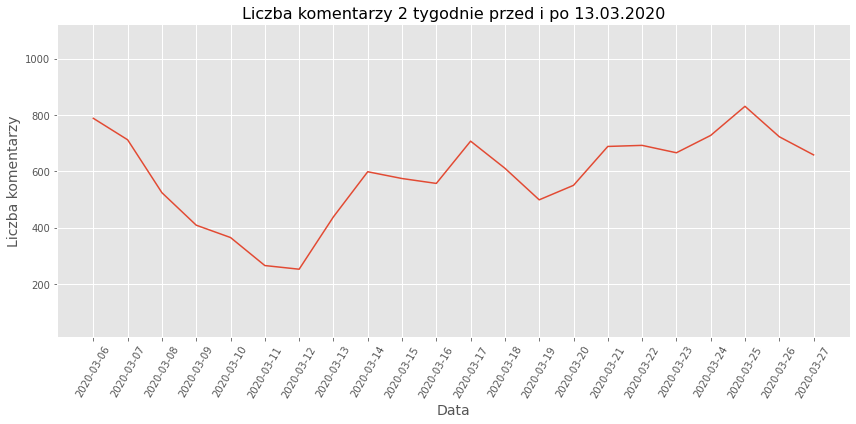

In [42]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('02.23.2020')
   and date(created_at) <= date('03.27.2020')
   and type = 2;
   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 13.03.2020",
         "liczba-komentarzy-dziennie-2tyg-13.03.2020")

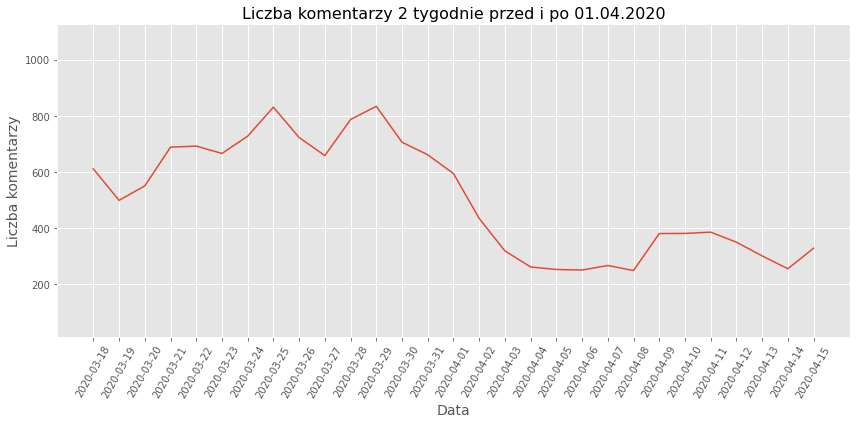

In [43]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('03.13.2020')
   and date(created_at) <= date('04.15.2020')
   and type = 2;

   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 01.04.2020",
         "liczba-komentarzy-dziennie-2tyg-01.04.2020")

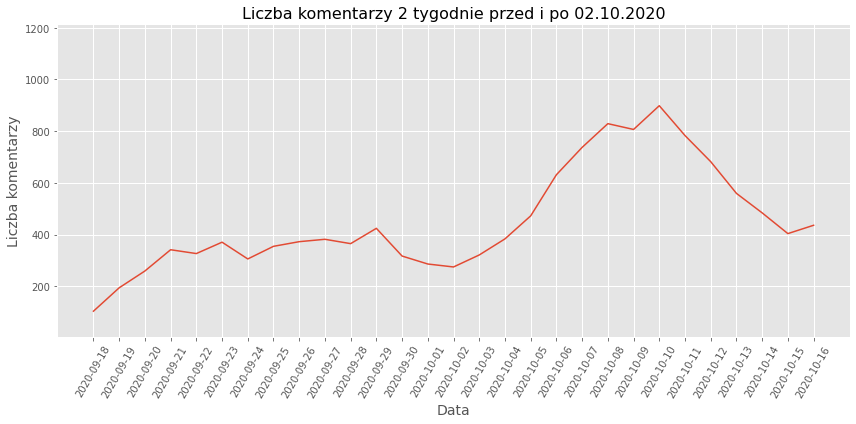

In [44]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('09.13.2020')
   and date(created_at) <= date('10.16.2020')
   and type = 2;
   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 02.10.2020",
         "liczba-komentarzy-dziennie-2tyg-02.10.2020")

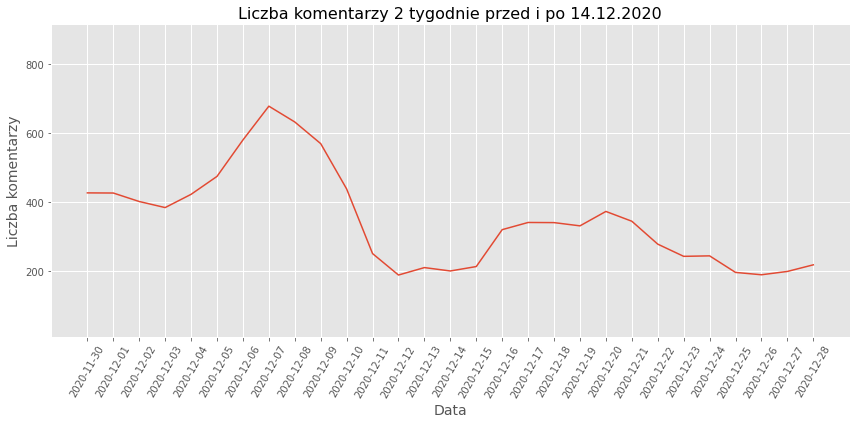

In [45]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('11.25.2020')
   and date(created_at) <= date('12.28.2020')
   and type = 2;
   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 14.12.2020",
         "liczba-komentarzy-dziennie-2tyg-14.12.2020")

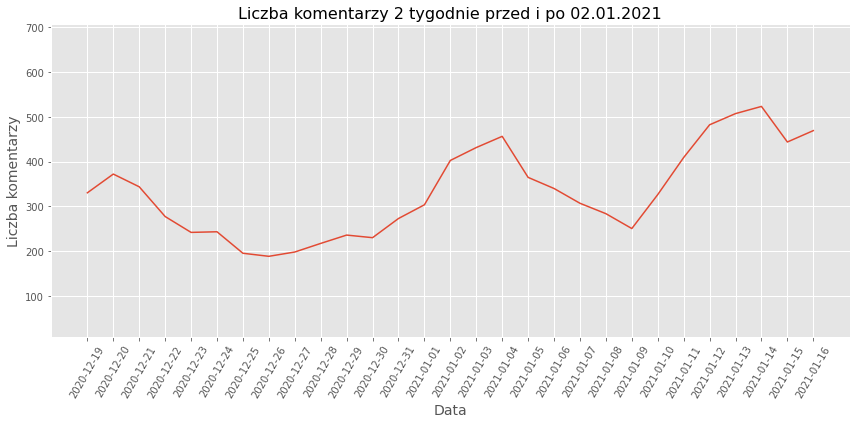

In [46]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('12.14.2020')
   and date(created_at) <= date('01.16.2021')
   and type = 2;
   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 02.01.2021",
         "liczba-komentarzy-dziennie-2tyg-02.01.2021")

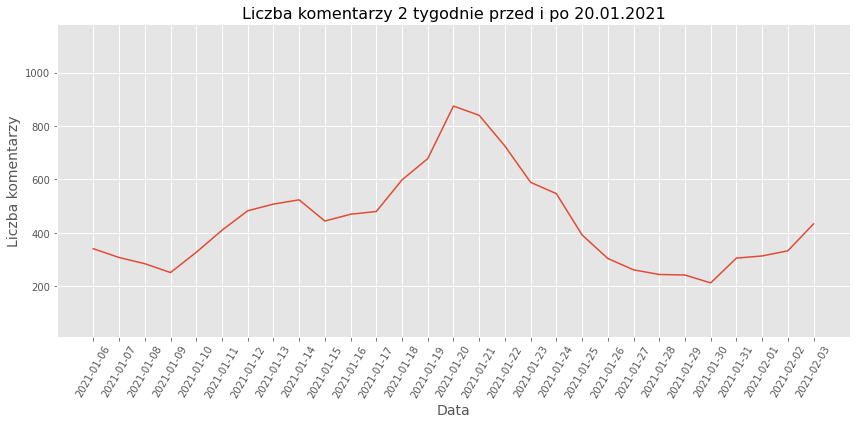

In [47]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date(created_at) as "Data"
from tweet
group by date(created_at), type
having date(created_at) >= date('01.01.2021')
   and date(created_at) <= date('02.03.2021')
   and type = 2;
   """
)

plot_bar(result['Data'], result['Liczba komentarzy'], "Data", "Liczba komentarzy",
         "Liczba komentarzy 2 tygodnie przed i po 20.01.2021",
         "liczba-komentarzy-dziennie-2tyg-20.01.2021")

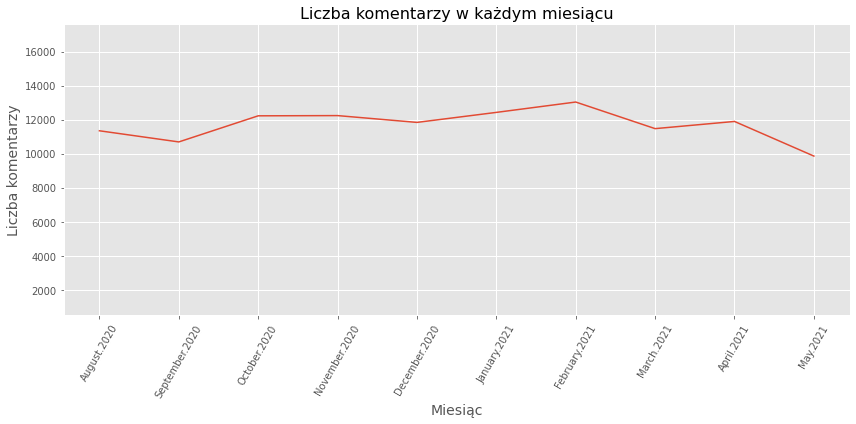

In [48]:
result = getAll(
    """
select count(*) as "Liczba komentarzy", date_part('month', created_at) as "Miesiąc", date_part('year', created_at) as rok
from tweet
group by date_part('month', created_at), date_part('year', created_at), type
having type = 2
order by date_part('year', created_at), date_part('month', created_at);
   """
)

xs = [f'{str(calendar.month_name[int(e)])}.{int(y)}' for e, y in zip(result['Miesiąc'], result['rok'])]

plot_bar(xs, result['Liczba komentarzy'], "Miesiąc", "Liczba komentarzy", "Liczba komentarzy w każdym miesiącu",
         "liczba-komentarzy-miesiecznie")



